<a href="https://colab.research.google.com/github/minu-97/TIL/blob/master/kobart_%EC%82%AC%EC%A0%84%ED%95%99%EC%8A%B5_%EC%B6%94%EA%B0%80%EB%8D%B0%EC%9D%B4%ED%84%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# kobart-sumarization 사전학습모델 출력 문장길이 증가를 위한 전이학습(ai허브 문서요약 데이터셋 사용)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## test데이터 셋 압축해제

In [ ]:
!pip install unzip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for unzip: filename=unzip-1.0.0-py3-none-any.whl size=1279 sha256=8e5d1f739b79a126516a3048dda79eb1d2811f07972882e375ffec442f87294c
  Stored in directory: /root/.cache/pip/wheels/80/dc/7a/f8af45bc239e7933509183f038ea8d46f3610aab82b35369f4
Successfully built unzip


In [ ]:
%cd /content/drive/MyDrive/multi/final_project/kobart_model/data/training/

/content/drive/MyDrive/multi/final_project/kobart_model/data/training


In [ ]:
pwd

'/content/drive/MyDrive/multi/final_project/kobart_model/data/training'

In [ ]:
# !unzip /content/drive/MyDrive/multi/final_project/kobart_model/data/training/TL1.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: 07.public/2~3sent/REPORT-public-16673-00001.json  
  inflating: 07.public/2~3sent/REPORT-public-16677-00011.json  
  inflating: 07.public/2~3sent/REPORT-public-16678-00010.json  
  inflating: 07.public/2~3sent/REPORT-public-16678-00011.json  
  inflating: 07.public/2~3sent/REPORT-public-16679-00002.json  
  inflating: 07.public/2~3sent/REPORT-public-16682-00002.json  
  inflating: 07.public/2~3sent/REPORT-public-16682-00008.json  
  inflating: 07.public/2~3sent/REPORT-public-16692-00011.json  
  inflating: 07.public/2~3sent/REPORT-public-16693-00008.json  
  inflating: 07.public/2~3sent/REPORT-public-16697-00007.json  
  inflating: 07.public/2~3sent/REPORT-public-16699-00003.json  
  inflating: 07.public/2~3sent/REPORT-public-16700-00004.json  
  inflating: 07.public/2~3sent/REPORT-public-16708-00003.json  
  inflating: 07.public/2~3sent/REPORT-public-16710-00001.json  
  inflating: 07.public/2~3sent/REPORT-public-16713-00015.json  
  in

## Validation 데이터 셋 압축해제

In [ ]:
%cd /content/drive/MyDrive/multi/final_project/kobart_model/data//validation/

/content/drive/MyDrive/multi/final_project/kobart_model/data/validation


In [ ]:
pwd

'/content/drive/MyDrive/multi/final_project/kobart_model/data/validation'

In [ ]:
# !unzip /content/drive/MyDrive/multi/final_project/kobart_model/data/validation/VL1.zip

Archive:  /content/drive/MyDrive/multi/final_project/kobart_model/data/validation/VL1.zip
   creating: 01.news_r/
   creating: 01.news_r/20per/
  inflating: 01.news_r/20per/REPORT-news_r-00014-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00035-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00042-00003.json  
  inflating: 01.news_r/20per/REPORT-news_r-00044-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00105-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00111-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00144-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00153-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00161-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00205-00002.json  
  inflating: 01.news_r/20per/REPORT-news_r-00220-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00261-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00266-00001.json  
  inflating: 01.news_r/20per/REPORT-news_r-00279-0

In [1]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 107.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 31.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 120.5 MB/s eta 0:00:00


In [2]:
!pip install "transformers[sentencepiece]"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 43.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.12.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.
tensorflow-metadata 1.13.1 requires protobuf<5,>=3.20.3, but you have protobuf 3.20.2 which is incompatible.


In [3]:
import transformers

print(transformers.__version__)

4.29.2


In [4]:
!pip install torch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 데이터 불러오기

In [1]:
import json

In [2]:
import pandas as pd
import numpy as np
import os
import json

data_list = []
topic_list = []
cnt = 0
data_path = '/content/drive/MyDrive/multi/final_project/kobart_model/data/training/01.news_r/2~3sent/'
folders = os.listdir(data_path)
print(len(folders))


for i in range(0,2000):
  if folders[i].split('.')[1] == 'json':
    file = data_path+folders[i]
    with open(file, 'r') as file:
      # print(i)
      data = json.load(file)
      data_str = ''.join(data.get('Meta(Refine)').get('passage'))
      data_list.append(data_str)
      topic_str = ''.join(data.get('Annotation').get('summary2'))
      topic_list.append(topic_str)
           
            
# dict 형태로 합치기
train_dict_dataset = {"input_text" : data_list, "target_text" :  topic_list}

10800


In [3]:
# import pandas as pd
# import numpy as np
# import os
# import json

# data_list = []
# topic_list = []
# cnt = 0
# data_path = '/content/drive/MyDrive/multi/final_project/kobart_model/data/validation/01.news_r/2~3sent/'
# folders = os.listdir(data_path)
# print(len(folders))


# for i in range(0,len(folders)):
#   if folders[i].split('.')[1] == 'json':
#     file = data_path+folders[i]
#     with open(file, 'r') as file:
#       data = json.load(file)
#       data_str = ''.join(data.get('Meta(Refine)').get('passage'))
#       data_list.append(data_str)
#       topic_str = ''.join(data.get('Annotation').get('summary2'))
#       topic_list.append(topic_str)
           
            
# # dict 형태로 합치기
# val_dict_dataset = {"input_text" : data_list, "target_text" :  topic_list}

In [4]:
# val_dataset

In [5]:
# # 토크나이저 및 모델 로드

# import torch
# from transformers import PreTrainedTokenizerFast
# from transformers import BartForConditionalGeneration

# tokenizer = PreTrainedTokenizerFast.from_pretrained('digit82/kobart-summarization')
# model = BartForConditionalGeneration.from_pretrained('digit82/kobart-summarization')

You passed along `num_labels=3` with an incompatible id to label map: {'0': 'NEGATIVE', '1': 'POSITIVE'}. The number of labels wil be overwritten to 2.


In [ ]:
# 토크나이저 및 모델 로드
# kobart -base-v2 버전 기반의 pretrained model로 변경
import torch
from transformers import PreTrainedTokenizerFast
from transformers import BartForConditionalGeneration

tokenizer = PreTrainedTokenizerFast.from_pretrained('gogmaza/kobart-summarization')
model = BartForConditionalGeneration.from_pretrained('gogmaza/kobart-summarization')

## 모델 평가하기

In [6]:
import torch 
class MyDataset(torch.utils.data.Dataset):
    def __init__(self, data):
        self.data = data

    def __getitem__(self, index):
        item = self.data[index]
        input_text = item['input_text']
        target_text = item['target_text']

        return input_text, target_text

    def __len__(self):
        return len(self.data)

In [7]:
len(train_dict_dataset["input_text"])

2000

## test dataset 생성

In [8]:
tr_data =[]
for i in range(len(train_dict_dataset["input_text"])):
    tr_data += [{'input_text': train_dict_dataset.get('input_text')[i],
     'target_text': train_dict_dataset.get('target_text')[i]}]

In [9]:
# 데이터셋 인스턴스 생성
tr_dataset = MyDataset(tr_data)

# 데이터셋의 요소에 접근하여 출력
for index in range(len(tr_dataset)):
  input_text, target_text = tr_dataset[index]
  # print(input_text, target_text)


In [10]:
for index in range(len(tr_dataset)):
    input_text, target_text = tr_dataset[index]
    # print('input :', input_text, 'target :',target_text)

In [11]:
def preprocess(data):
    
    # for index in range(len(dataset)):
    #     input_text, target_text = dataset[index]
    #     #print('input :', input_text, 'target :',target_text)
    

    # 입력 및 대상 텍스트를 토큰화합니다.
    input_tokens = tokenizer.encode_plus(input_text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
    target_tokens = tokenizer.encode_plus(target_text, padding='max_length', truncation=True, max_length=512, return_tensors='pt')
    
    # 토큰화된 입력과 대상을 텐서로 변환합니다.
    input_ids = input_tokens['input_ids'].squeeze()
    input_attention_mask = input_tokens['attention_mask'].squeeze()
    
    target_ids = target_tokens['input_ids'].squeeze()
    target_attention_mask = target_tokens['attention_mask'].squeeze()
    
    return {'input_ids': input_ids, 'attention_mask': input_attention_mask, 'target_ids': target_ids, 'target_attention_mask': target_attention_mask}


In [12]:
train_dataset =[]
for i in range(len(tr_dataset.data)):
    train_dataset.append(preprocess(tr_dataset.data[i]))

## val dataset 생성

In [13]:
# len(val_dict_dataset["input_text"])

In [14]:
# # val_data =[]
# for i in range(1350):
#     val_data += [{'input_text': val_dict_dataset.get('input_text')[i],
#      'target_text': val_dict_dataset.get('target_text')[i]}]

In [15]:
# # 데이터셋 인스턴스 생성
# val_dataset = MyDataset(data)

# # 데이터셋의 요소에 접근하여 출력
# for index in range(len(val_dataset)):
#   input_text, target_text = val_dataset[index]
#   print(input_text, target_text)

In [16]:
# for index in range(len(val_dataset)):
#     input_text, target_text = val_dataset[index]
#     # print('input :', input_text, 'target :',target_text)

In [17]:
# valid_dataset =[]
# for i in range(len(val_dataset.data)):
#     valid_dataset.append(preprocess(val_dataset.data[i]))

In [18]:
from sklearn.model_selection import train_test_split

train_dataset, test_dataset = train_test_split(train_dataset, random_state = 42, test_size = 0.2)

In [19]:
import torch

# Set the batch size

BATCH_SIZE = 8
# Convert train_dataset into a DataLoader
train_loader = torch.utils.data.DataLoader(train_dataset, 
                                           batch_size=BATCH_SIZE,
                                           shuffle=True,
                                           num_workers=0)

#Convert val_dataset into a DataLoader
val_loader = torch.utils.data.DataLoader(test_dataset, 
                                         batch_size=BATCH_SIZE,
                                         shuffle=False,
                                         num_workers=0)

In [20]:
from transformers import AdamW
from transformers import get_linear_schedule_with_warmup

learning_rate = 1e-2
weight_decay = 0.0 #0.01
adam_epsilon = 1e-8
#warmup_steps = 8
max_steps =  20000

# Define optimizer
optimizer = AdamW(model.parameters(), lr=learning_rate, eps=adam_epsilon, weight_decay=weight_decay)
#scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps=warmup_steps, num_training_steps=max_steps)

# Define loss function
loss_fn = torch.nn.CrossEntropyLoss(ignore_index=model.config.pad_token_id)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:407: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


In [21]:
import torch

# GPU 사용 가능 여부 확인
if torch.cuda.is_available():
    # GPU를 디바이스로 설정
    device = torch.device("cuda")
else:
    # CPU를 디바이스로 설정
    device = torch.device("cpu")

In [28]:
# from numba import cuda

# #이후 초기화 작업을 진행해줍니다.
# device = cuda.get_current_device()
# device.reset()

In [ ]:
%%time 
loss_t =[] 
loss_e =[]

import torch

# Set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Set the number of epochs
NUM_EPOCHS = 200

# Move the model to the device
model = model.to(device)


### Set the optimizer
### optimizer = torch.optim.Adam(model.parameters(), lr=1e-5)

# Set the best loss and best model state
best_loss = float('inf')
best_model_state = None
checkpoint = 1
# Training loop
for epoch in range(NUM_EPOCHS):
    model.train()  # Set the model to training mode
    train_loss = 0  # Initialize training loss
    
    for batch in train_loader:
        # Move the batch to the device
        input_ids = batch['input_ids'].to(device)
        target_ids = batch['target_ids'].to(device)     
        
        # Zero the gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(input_ids=input_ids, decoder_input_ids=target_ids)
        
        # Compute the loss
        loss = loss_fn(outputs.logits.view(-1, outputs.logits.shape[-1]), target_ids.contiguous().view(-1))
        
        # Backward pass
        loss.backward()
        
        # Update parameters
        optimizer.step()
        
        # Update training loss
        train_loss += loss.item()
    
    # Calculate average training loss per epoch
    train_loss /= len(train_loader)
    
    # Print training loss
    print('Epoch [{}/{}], Training Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, train_loss))
    
   
    # Evaluation
    model.eval()  # Set the model to evaluation mode
    eval_loss = 0  # Initialize evaluation loss
    
    with torch.no_grad():
        for batch in val_loader:
            # Move the batch to the device
            input_ids = batch['input_ids'].to(device)
            target_ids = batch['target_ids'].to(device)
            
            # Forward pass
            outputs = model(input_ids=input_ids, decoder_input_ids=target_ids)
            
            # Compute the loss
            loss = loss_fn(outputs.logits.view(-1, outputs.logits.shape[-1]), target_ids.contiguous().view(-1))
            
            # Update evaluation loss
            eval_loss += loss.item()
    
    # Calculate average evaluation loss per epoch
    eval_loss /= len(val_loader)
    
    # Print evaluation loss
    print('Epoch [{}/{}], Evaluation Loss: {:.4f}'.format(epoch+1, NUM_EPOCHS, eval_loss))
    
    loss_t.append(train_loss)
    loss_e.append(eval_loss)

    # Check if the current model has the best loss
    if train_loss < best_loss:
        best_loss = train_loss
        best_model_state = model.state_dict()
    if (epoch + 1) % 1000 == 0:
      torch.save(
          {
              "model": "model",
              "epoch": epoch,
              "model_state_dict": model.state_dict(),
              "optimizer_state_dict": optimizer.state_dict(),
              "cost": train_loss,
              "description": f"model 체크포인트-{checkpoint}",
          },
          f"/content/drive/MyDrive/multi/final_project/kobart_model/checkpoint/{checkpoint}.pt",
      )
      checkpoint += 1

torch.save(model.state_dict(), "/content/drive/MyDrive/multi/final_project/kobart_model/weight/0529/" + 'model_state_dict.pt')
# Load the best model state
model.load_state_dict(best_model_state)
#torch.save(model.state_dict(), './output/saved_model')

Epoch [1/200], Training Loss: 8.7770
Epoch [1/200], Evaluation Loss: 3.8970
Epoch [2/200], Training Loss: 3.9858
Epoch [2/200], Evaluation Loss: 3.8978
Epoch [3/200], Training Loss: 3.9176
Epoch [3/200], Evaluation Loss: 3.8984
Epoch [4/200], Training Loss: 3.9114
Epoch [4/200], Evaluation Loss: 3.8959
Epoch [5/200], Training Loss: 3.9102
Epoch [5/200], Evaluation Loss: 3.8904
Epoch [6/200], Training Loss: 3.9081
Epoch [6/200], Evaluation Loss: 3.8880
Epoch [7/200], Training Loss: 3.9063
Epoch [7/200], Evaluation Loss: 3.8906
Epoch [8/200], Training Loss: 3.9020
Epoch [8/200], Evaluation Loss: 3.8872
Epoch [9/200], Training Loss: 3.8980
Epoch [9/200], Evaluation Loss: 3.8884
Epoch [10/200], Training Loss: 3.8949
Epoch [10/200], Evaluation Loss: 3.8874
Epoch [11/200], Training Loss: 3.8935
Epoch [11/200], Evaluation Loss: 3.8871
Epoch [12/200], Training Loss: 3.8919
Epoch [12/200], Evaluation Loss: 3.8870
Epoch [13/200], Training Loss: 3.8916
Epoch [13/200], Evaluation Loss: 3.8868
Epoc

In [25]:
import numpy as np
mean = np.mean(loss_e)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [ ]:
mean

11.639904975891113

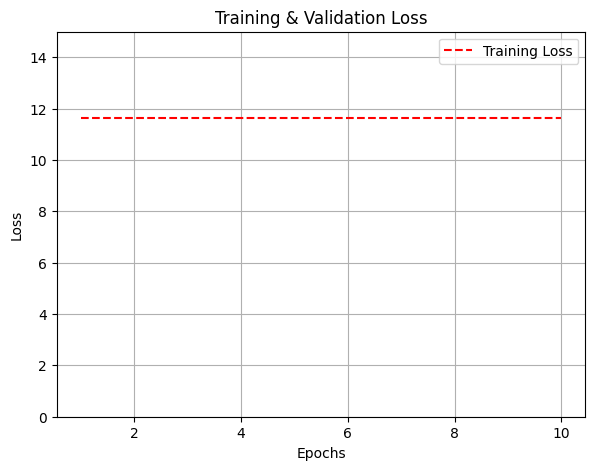

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, NUM_EPOCHS +1)

plt.figure(figsize = (15, 5))

plt.subplot(1, 2, 1)
# plt.plot(epochs, loss_t, 'b-')
plt.plot(epochs, loss_e, 'r--')
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim([0,15])
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()

plt.show()

In [ ]:
import torch

# GPU 사용 가능 여부 확인
if torch.cuda.is_available():
    # GPU를 디바이스로 설정
    device = torch.device("cuda")
else:
    # CPU를 디바이스로 설정
    device = torch.device("cpu")

SyntaxError: ignored

In [ ]:
!pip install rouge

In [ ]:
from rouge import Rouge
Rouge_list = []
# for i in range(0, len(model_out)):
reference = [reference_str]
rouge = Rouge()
rouge.get_scores([summary_news_1], reference , avg = True)

In [ ]:
from rouge import Rouge
Rouge_list = []
# for i in range(0, len(model_out)):
reference = [reference_str]
rouge = Rouge()
rouge.get_scores([summary_news_4], reference , avg = True)

In [ ]:
!pip install konlpy

In [ ]:
! git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
%cd Mecab-ko-for-Google-Colab
!bash install_mecab-ko_on_colab190912.sh

In [ ]:
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

In [ ]:
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

In [ ]:
%%bash
bash <(curl -s https://raw.githubusercontent.com/konlpy/konlpy/master/scripts/mecab.sh)
pip3 install /tmp/mecab-python-0.996

In [ ]:
from konlpy.tag import Mecab
#from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

from konlpy.tag import Mecab
from nltk.translate.bleu_score import corpus_bleu

mecab = Mecab()

# for i in range(0, len(model_out)):
reference = [reference_str]
reference = [[mecab.morphs(s) for s in reference]]
candidate = [mecab.morphs(summary_news_1)]

print(f'reference: {reference}')
print('candidate:', candidate)
print('BLEU:', corpus_bleu(reference, candidate))


score1 = corpus_bleu(reference, candidate, weights=(1, 0, 0, 0))
score2 = corpus_bleu(reference, candidate, weights=(0, 1, 0, 0))
score3 = corpus_bleu(reference, candidate, weights=(0, 0, 1, 0))
score4 = corpus_bleu(reference, candidate, weights=(0, 0, 0, 1))

print("Individual 1-gram : ", score1)  
print("Individual 2-gram : ", score2)  
print("Individual 3-gram : ", score3)  
print("Individual 4-gram : ", score4)  

#기본적으로 sentence_bleu() 함수는 BLEU-4라고도 하는 누적 4그램 BLEU 점수를 계산합니다. 
#BLEU-4의 가중치는 다음과 같습니다.
#이것이 n-gram 가중치를 추가하지 않고 얻은 정확한 점수입니다.

score = corpus_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print("BLEU-4 : ", score)  

In [ ]:
from konlpy.tag import Mecab
#from nltk.translate.bleu_score import sentence_bleu
from nltk.translate.bleu_score import corpus_bleu

from konlpy.tag import Mecab
from nltk.translate.bleu_score import corpus_bleu

mecab = Mecab()

# for i in range(0, len(model_out)):
reference = [reference_str]
reference = [[mecab.morphs(s) for s in reference]]
candidate = [mecab.morphs(summary_news_4)]

print(f'reference: {reference}')
print('candidate:', candidate)
print('BLEU:', corpus_bleu(reference, candidate))


score1 = corpus_bleu(reference, candidate, weights=(1, 0, 0, 0))
score2 = corpus_bleu(reference, candidate, weights=(0, 1, 0, 0))
score3 = corpus_bleu(reference, candidate, weights=(0, 0, 1, 0))
score4 = corpus_bleu(reference, candidate, weights=(0, 0, 0, 1))

print("Individual 1-gram : ", score1)  
print("Individual 2-gram : ", score2)  
print("Individual 3-gram : ", score3)  
print("Individual 4-gram : ", score4)  

#기본적으로 sentence_bleu() 함수는 BLEU-4라고도 하는 누적 4그램 BLEU 점수를 계산합니다. 
#BLEU-4의 가중치는 다음과 같습니다.
#이것이 n-gram 가중치를 추가하지 않고 얻은 정확한 점수입니다.

score = corpus_bleu(reference, candidate, weights=(0.25, 0.25, 0.25, 0.25))
print("BLEU-4 : ", score)  